In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.io import fits
import os

In [2]:
"""
Our Helper Functions
"""

def flat_field_calculation(path):
    """
    Iterates through the given directory containing the images.
    """
    flat_field = np.zeros((1040, 1392))
    
    os.chdir(path)
    # iterate through the names of contents of the folder
    for image in os.listdir(path):
        hdul = astropy.io.fits.open(image)
        image_array = hdul[0].data
        image_means.append(np.mean(image_array))
        image_medians.append(np.median(image_array))
        image_max.append(np.median(image_array))
        
        norm_image_array = image_array / np.median(image_array)
        flat_field += norm_image_array
        
    return (flat_field / len(image_means), len(image_means))
        
    
def median_flat_field_calculation(path, flatfield=True):
    lst = [] 
    os.chdir(path)
    for image in os.listdir(path):
        hdul = astropy.io.fits.open(image)
        image_array = hdul[0].data
        norm_image_array = image_array / np.median(image_array)
        lst.append(norm_image_array)
    if flatfield:
        return (np.median(lst, axis=0))
    else:
        return lst

In [3]:
image_means = []
image_medians = []
image_max = []

# Path to the folder containing images (From 8:11-8:45pm)
path = "C:/Users/16472/Desktop/BlastTNG/Flat_Field_Calculations/xsc0_flat_field_images"


# Calculates the mean, median, max of each image taken from the time period
# as well as our flat field!

mean_flat_field, num_images = flat_field_calculation(path)
med_flat_field = median_flat_field_calculation(path) 

# Save the array in a file
os.chdir("C:/Users/16472/Desktop/BlastTNG/Flat_Field_Calculations/")
# np.save("xsc0_flat_field", med_flat_field)

Using 244 images, our flat field calculations are: 



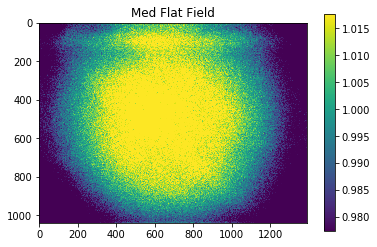

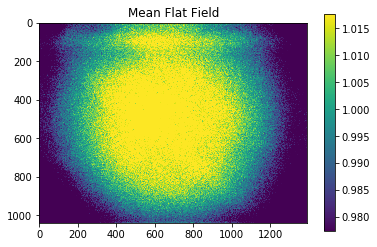

In [4]:
# Our flat-field calculation based on images between (8:11-8:45pm)

print("Using " + str(num_images) + " images, our flat field calculations are: \n")


max = np.mean(med_flat_field) + np.std(med_flat_field) * 1
min = np.mean(med_flat_field) - np.std(med_flat_field) * 1

plt.figure("Med Flat Field")
plt.title("Med Flat Field")
plt.imshow(med_flat_field, vmax=max, vmin=min)
plt.colorbar()
plt.show()

plt.figure("Mean Flat Field")
plt.title("Mean Flat Field")
plt.imshow(mean_flat_field, vmax=max, vmin=min)
plt.colorbar()
plt.show()

In [5]:
# MEDIAN ABSOLUTE DEVIATION Calculation
med_lsts = median_flat_field_calculation(path, False)

med_diffs = []
for img in med_lsts:
    med_diffs.append(np.abs(img-med_flat_field))
    
median_absolute_deviation = np.median(med_diffs, axis=0)

In [6]:
# Our Median absolute deviation values.
print(median_absolute_deviation)

[[0.00847149 0.00777235 0.00891423 ... 0.00895051 0.00954067 0.00804965]
 [0.00856951 0.00955789 0.00745772 ... 0.00810558 0.00782562 0.00918078]
 [0.00797121 0.00920385 0.007254   ... 0.0090514  0.00832262 0.00841472]
 ...
 [0.00816998 0.00801238 0.00757174 ... 0.0067843  0.00877063 0.00731024]
 [0.00800452 0.00788255 0.00792969 ... 0.00806644 0.00783981 0.0079132 ]
 [0.00889612 0.00918654 0.00829165 ... 0.00761469 0.00783013 0.0082198 ]]


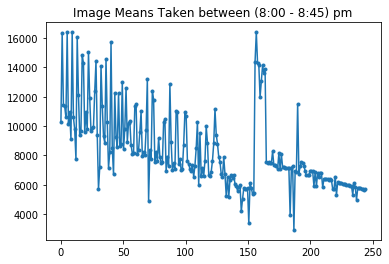

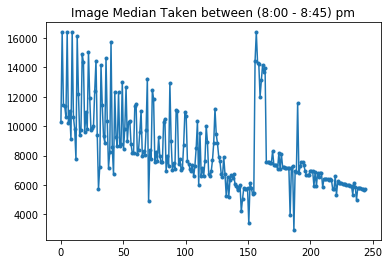

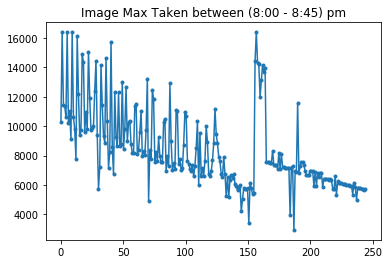

Mean of Means:  8343.330342168158
Standard Deviation of Means:  2704.91404570315

Mean of Medians:  8364.54918032787
Standard Deviation of Medians:  2713.6516656224308

Mean of Maxess:  8364.54918032787
Standard Deviation of Maxes:  2713.6516656224308


In [35]:
# Figures

x = np.linspace(0, len(image_means), len(image_means))

time_int = ' Taken between (8:00 - 8:45) pm'

plt.figure("Image Means" + time_int)
plt.title("Image Means" + time_int)
plt.plot(x, image_means, marker='.')
plt.show()

plt.figure("Image Median" + time_int)
plt.title("Image Median" + time_int)
plt.plot(x, image_medians, marker='.')

plt.figure("Image Max" + time_int)
plt.title("Image Max" + time_int)
plt.plot(x, image_max, marker='.')
plt.show()


print("Mean of Means: ", np.mean(image_means))
print("Standard Deviation of Means: ", np.std(image_means))

print("\nMean of Medians: ", np.mean(image_medians))
print("Standard Deviation of Medians: ", np.std(image_medians))

print("\nMean of Maxess: ", np.mean(image_max))
print("Standard Deviation of Maxes: ", np.std(image_max))